De acordo com o teste de Wilcoxon, não houve diferença significativa entre os resultados obtidos com 5 e com 30 enxames de partículas. Portanto, o critério adotado para a escolha da quantidade de enxames foi a menor ocorrência de valores zero em cada evento e a maior mediana entre os valores de hipervolume em cada evento. Segundo esse critério, foi adotada a configuração com 30 enxames de 60 partículas cada.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

%matplotlib inline

def algorithm_dataset(raw_data, algorithm_id, sorted_by="event", zero_values=False):
    data = raw_data.loc[[algorithm_id]]
    data = data.sort_values(by=sorted_by)
    if not zero_values:
        data = data[data.hypervolume != 0]
    return data

def comparison_dataset(ds):
    return ds.groupby(["algorithm","event"], as_index=False)["hypervolume"].mean()

def max_event(ds):
    return ds["event"].max()

column_labels = ["algorithm", "instance", "execution", "event", "hypervolume"] 
# data_5_200 = pd.read_csv("../hypervolume/metrics-ms2mo-5-200.csv", 
#                    delimiter=" ", 
#                    header=None,     
#                    names=column_labels,
#                    index_col=column_labels[0])
# data_30_60 = pd.read_csv("../hypervolume/metrics-ms2mo-30-60.csv", 
#                    delimiter=" ", 
#                    header=None,     
#                    names=column_labels,
#                    index_col=column_labels[0])

# data = data_5_200.append(data_30_60)
data = pd.read_csv("../hypervolume/metrics.csv", 
                   delimiter=" ", 
                   header=None,     
                   names=column_labels,
                   index_col=column_labels[0])
data.describe()

,execution,event,hypervolume
count,5307.000000,5307.000000,5307.000000
mean,5.498587,132.323347,0.085111
std,2.864010,76.857904,0.292770
min,1.000000,0.000000,0.000000
25%,3.000000,66.000000,0.000000
50%,5.000000,132.000000,0.000000
75%,8.000000,198.500000,0.000000
max,10.000000,279.000000,1.426079


In [17]:
ds_30_60 = algorithm_dataset(data, "ms2mo_30s60p", zero_values=True)
ds_5_200 = algorithm_dataset(data, "ms2mo_5s200p", zero_values=True)
ds_30_60_nz = algorithm_dataset(data, "ms2mo_30s60p")
ds_5_200_nz = algorithm_dataset(data, "ms2mo_5s200p")

datasets = {
    "poucos": comparison_dataset(ds_5_200),
    "muitos": comparison_dataset(ds_30_60),
    "poucos_nz": comparison_dataset(ds_5_200_nz),
    "muitos_nz": comparison_dataset(ds_30_60_nz),
}

min_event = min([max_event(ds) for ds in datasets.values()])

for k in datasets.keys():
    datasets[k] = datasets[k][:min_event+1]

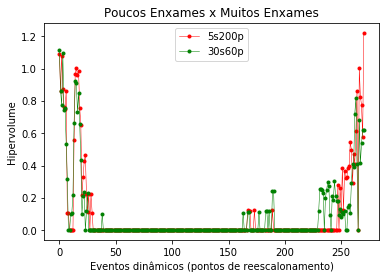

In [18]:
plt.title("Poucos Enxames x Muitos Enxames")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["poucos"].event, datasets["poucos"].hypervolume, "-ro", markersize=3, lw=.5, label="5s200p")
plt.plot(datasets["muitos"].event, datasets["muitos"].hypervolume, "-go", markersize=3, lw=.5, label="30s60p")
plt.legend()
plt.show()

In [19]:
s, p = wilcoxon(datasets["poucos"].hypervolume, datasets["muitos"].hypervolume)

if (p <= 0.05):
    print("p-value = ", p, "Há diferença significativa!")
else:
    print("p-value = ", p, "Não há diferença significativa.")

p-value =  0.5124877566552761 Não há diferença significativa.


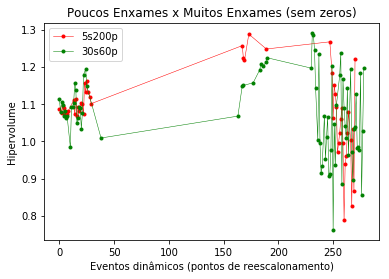

In [20]:
plt.title("Poucos Enxames x Muitos Enxames (sem zeros)")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["poucos_nz"].event, datasets["poucos_nz"].hypervolume, "-ro", markersize=3, lw=.5, label="5s200p")
plt.plot(datasets["muitos_nz"].event, datasets["muitos_nz"].hypervolume, "-go", markersize=3, lw=.5, label="30s60p")
plt.legend()
plt.show()

In [21]:
ds_30_60_nz.hypervolume.describe()

count    215.000000
mean       1.083293
std        0.129369
min        0.628375
25%        1.033105
50%        1.096534
75%        1.149793
max        1.426079
Name: hypervolume, dtype: float64

In [24]:
ds_30_60_nz.hypervolume.median()

1.0965340000000001

In [25]:
ds_5_200_nz.hypervolume.describe()

count    204.000000
mean       1.072436
std        0.115946
min        0.471823
25%        1.043515
50%        1.080981
75%        1.134202
max        1.308650
Name: hypervolume, dtype: float64

In [27]:
ds_5_200_nz.hypervolume.median()

1.080981